# [CDAF] Atividade 2

## Nome e matrícula
Nome: Luís Felipe Ramos Ferreira
Matrícula: 2019022553

## Introdução
Nesta atividade, vamos revisar os conceitos aprendidos em sala de aula sobre estatísticas agregadas. Para esta atividade, usaremos dados do Brasileirão 2022 do FBRef.

## Questão 1
- Baixe o dataset de resultados em https://fbref.com/en/comps/24/2022/schedule/2022-Serie-A-Scores-and-Fixtures
- Crie uma média móvel de 5 jogos, para cada equipe, de cada uma das seguintes estatísticas: xG pró, xG contra, e dif. xG.
- Escolha 4 times para visualizar a série temporal das estatísticas acima. Uma visualização para cada uma das estatísticas, onde a média geral do campeonato é apresentada com uma linha pontilhada em conjunto com a média móvel dos times escolhidos.
- Interprete os resultados. O que isso pode indicar sobre a qualidade ofensiva e defensiva dos times escolhidos?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df: pd.DataFrame = pd.read_csv("../data/sportsref.csv")
df.drop(columns=["Match Report", "Notes"], inplace=True)
df.rename(columns={"xG": "xG_Home", "xG.1": "xG_Away"}, inplace=True)
df["xG_diff"] = df["xG_Home"] - df["xG_Away"]
df

,Wk,Day,Date,Time,Home,xG_Home,Score,xG_Away,Away,Attendance,Venue,Referee,xG_diff
0,1,Sat,2022-04-09,16:30,Fluminense,1.6,0–0,0.1,Santos,22855.0,Estadio Jornalista Mário Filho,Anderson Daronco,1.5
1,1,Sat,2022-04-09,19:00,Atl Goianiense,1.4,1–1,1.2,Flamengo,10496.0,Estádio Antônio Accioly,Braulio da Silva Machado,0.2
2,1,Sun,2022-04-10,11:00,Coritiba,1.7,3–0,0.4,Goiás,17788.0,Estádio Major Antônio Couto Pereira,Raphael Claus,1.3
3,1,Sun,2022-04-10,16:00,Atlético Mineiro,1.9,2–0,0.6,Internacional,37531.0,Estádio Governador Magalhães Pinto,Bruno Arleu de Araujo,1.3
4,1,Sun,2022-04-10,16:00,Botafogo (RJ),1.5,1–3,2.1,Corinthians,36898.0,Estádio Nilton Santos,Wilton Sampaio,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,38,Sun,2022-11-13,16:00,Bragantino,0.9,0–1,0.6,Fluminense,NaN,Estádio Nabi Abi Chedid,Bruno Arleu de Araujo,0.3
376,38,Sun,2022-11-13,16:00,América (MG),2.1,1–1,0.5,Atl Goianiense,NaN,Estádio Raimundo Sampaio,Leandro Pedro Vuaden,1.6
377,38,Sun,2022-11-13,16:00,Goiás,0.2,0–4,1.7,São Paulo,NaN,Estádio de Hailé Pinheiro,Marcelo de Lima Henrique,-1.5
378,38,Sun,2022-11-13,16:00,Internacional,1.4,3–0,1.3,Palmeiras,NaN,Estádio José Pinheiro Borba,Bruno Arleu de Araujo,0.1


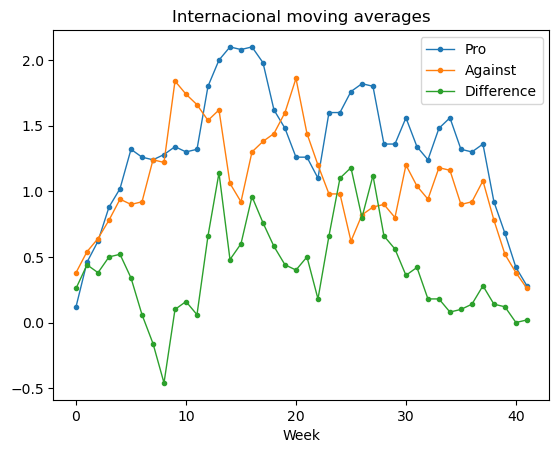

In [6]:
# function to calculate and plot the moving average of a team for xG_pro, xG_against and xG_diff
def plot_moving_average(df: pd.DataFrame, team: str, size: int) -> None:
    team_df: pd.DataFrame = df[(df["Home"] == team) | (df["Away"] == team)]
    team_df["xG_pro"] = np.where(team_df["Home"] == team, team_df["xG_Home"], team_df["xG_Away"])
    team_df["xG_against"] = np.where(team_df["Home"] == team, team_df["xG_Away"], team_df["xG_Home"])
    xG_pro_moving_avg: np.array = np.convolve(np.array(team_df["xG_pro"]), np.ones(size)) / size
    xG_against_moving_avg: np.array = np.convolve(np.array(team_df["xG_against"]), np.ones(size)) / size
    xG_diff_moving_avg: np.array = np.convolve(np.array(team_df["xG_diff"]), np.ones(size)) / size
    plt.plot(xG_pro_moving_avg,  marker='o', linewidth=1, markersize=3, label="Pro")
    plt.plot(xG_against_moving_avg, marker='o', linewidth=1, markersize=3, label="Against")
    plt.plot(xG_diff_moving_avg,  marker='o', linewidth=1, markersize=3, label="Difference")
    plt.title(f"{team} moving averages")
    plt.xlabel("Week")
    plt.legend()
    plt.show()
plot_moving_average(df=df, team="Internacional", size=5)


## Questão 2
- Agora repita a questão 1, plotando as séries temporais dos mesmos times, mas para uma janela móvel de 10 jogos.
- Quais as diferenças entre as séries temporais de 5 e 10 jogos? Em quais situações pode ser vantajoso escolher uma janela à outra?

## Questão 3
- Vá para o link
-- https://fbref.com/en/comps/24/2022/stats/2022-Serie-A-Stats
- Nesta seção de estatísticas, é possível navegar por estatísticas específicas para diferentes aspectos do jogo (finalização, passe, defesa, etc.). Para todos exercícios à partir deste, você terá que selecionar aquelas que julgar mais relevantes para responder as questões.
- Monte um radar plot com 6 atributos relevantes para atacantes e compare 3 jogadores de sua escolha. Justifique a escolha de cada um dos atributos, a escolha da escala dos radares e o tipo de normalização. Interprete os resultados dos radares em termos das qualidades e limitações dos jogadores.
- Ref Soccermatics:
-- https://soccermatics.readthedocs.io/en/latest/lesson3/ScoutingPlayers.html
-- https://soccermatics.readthedocs.io/en/latest/gallery/lesson3/plot_RadarPlot.html

## Questão 4
- Faça o mesmo que na questão 3, mas para meio campistas.

## Questão 5
- Faça o mesmo que na questão 3, mas para zagueiros.

## Questão 6
- Discuta as diferenças entre os radares das questões 3, 4 e 5. Quais são as principais diferenças entre os atributos relevantes para cada posição? Quais são as principais semelhanças? A impressão subjetiva que você tinha dos jogadores se comprovou pelos radares? Se não, por quê? Quais posições são mais difíceis de serem avaliadas por estatísticas?